In [6]:
import networkx as nx

In [5]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [13]:
%matplotlib inline

d:\python\python36\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


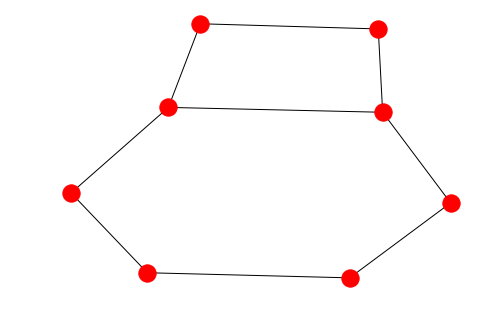

In [34]:
connection = {
    0: [1, 5,3], 
    1: [0, 2], 
    2: [1, 3], 
    3: [0,2, 4], 
    4: [3 , 7],
    5: [0, 6], 
    6: [5, 7],
    7: [6,4]
}
g = nx.Graph(connection)
nx.draw(g)

In [32]:
def bfs(start,graph_info):
    queue = [[start]]
    visit = set()
    while queue:
        front = queue.pop(0)
        node = front[-1]
        if node in visit:
            continue
        visit.add(node)
        print(front)
        for next_node in graph_info[node]:
            queue.append(front + [next_node])             
                
    

In [35]:
bfs(1,connection)

[1]
[1, 0]
[1, 2]
[1, 0, 5]
[1, 0, 3]
[1, 0, 5, 6]
[1, 0, 3, 4]
[1, 0, 5, 6, 7]


In [11]:
grammar_string = """
expression = operator op operator
operator = num op num
non-zero = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
zeros = 0 | zeros zeros
num = 0 | non-zero | non-zero zeros num | non-zero num
op = + | - | * 
"""

In [12]:
grammar={}
for line in grammar_string.split('\n'):
    line = line.strip()
    if not line:
        continue
    left,right =line.split('=')
    grammar[left.strip()] = [r.split() for r in right.split('|')]

print(grammar)

{'expression': [['operator', 'op', 'operator']], 'operator': [['num', 'op', 'num']], 'non-zero': [['1'], ['2'], ['3'], ['4'], ['5'], ['6'], ['7'], ['8'], ['9']], 'zeros': [['0'], ['zeros', 'zeros']], 'num': [['0'], ['non-zero'], ['non-zero', 'zeros', 'num'], ['non-zero', 'num']], 'op': [['+'], ['-'], ['*']]}


In [13]:
import random

In [16]:
def generator_with_grammar(grammar,target='expression'):
    if target not in grammar:
        return target
    rule = random.choice(grammar[target])
    return ''.join(generator_with_grammar(grammar,target=r) for r in rule if r!='null')

print(generator_with_grammar(grammar))

0+2-32*1


In [1]:
import re

In [74]:
import random
def get_response(saying, response_rules):
    for key,value in response_rules.items():
        match_result = re.match(key,saying)
        if match_result:
            return random.choice(value).format(match_result.groups())


In [75]:
rules = {
    ".*如果(.*)": ["真的吗？如果{0[0]}？"],
    "我是(.*)": ["你真的是{0[0]}吗？", "我已经知道你是{0[0]}了。"],
    "(.*)就像(.*)":["你觉得{0[0]}和{0[1]}有什么相似性？"]
}
print(get_response("英雄联盟就像dota2",rules))
print(get_response("如果不加班就好了",rules))
print(get_response("我是傻逼",rules))


你觉得英雄联盟和dota2有什么相似性？
真的吗？如果不加班就好了？
你真的是傻逼吗？


In [ ]:
1.这样的程序有什么优点？有什么缺点？你有什么可以改进的方法吗？
完成基本的对话;必须符合某种模式，且受优先级影响;可以对于优先级方面也使用随机处理。
2.什么是数据驱动？数据驱动在这个程序里如何体现？
我的理解是根据日常大量数据总结某种逻辑，写成规则。
3.数据驱动与 AI 的关系是什么？
我的理解是AI和统计息息相关，一些人类难以分析理解的逻辑干脆不去深究，直接从大量的数据表征中按概率推测其中的模式。